<a href="https://colab.research.google.com/github/Nimisha-Nooti/hotel-data-analysis/blob/main/Group_EDA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Due to strong growth of hospitality industry and hotel sector specifically in recent years there is an increased need from management and industry professionals in order to understand how guest select hotels to stay in and what are decision making factors that prevail. Furthermore, goal of this project is to analyse in depth and compare data that is discussing selection process of hotel booking as well as what decision making process guest follow.This is contributed to the fact that most of previous studies focused on choice attributes rather than decision-making process itself.

what we are doing in this kernel is something like:



1.   **Basic cleaning** : seperating the required data from the data set to use it for analysing.
2.    **Understanding the factors effecting the booking** : Factors like 
seasons, festivals and holidays effect the data.
3.   **Univariable study** :  We'll just focus on the dependent variable and try to know a little bit more about it.
4.    **Test assumptions** : We'll check if our data meets the assumptions required by most multivariate techniques.





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data science/module 1/capstone project/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

In [5]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            



We can notice that maximum columns has non-null values by using 'info()' method. There are 4 columns('country', 'children', 'agent, 'company') with null values. Hence, sort the non-null values in rows of that columns. so that, working on data can be made flexible. 



In [7]:
hotel_df.isna().sum().sort_values(ascending = False).head()

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [8]:
new_hotel_df = hotel_df.copy()

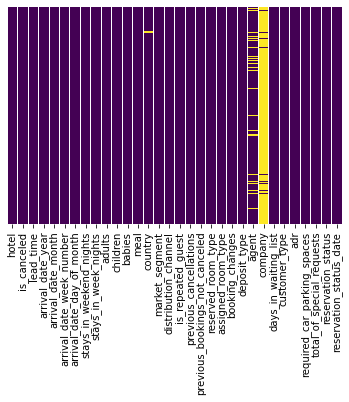

In [9]:
# representing null value columns in the given data set using heatmap:
sns.heatmap(new_hotel_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
new_hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
# Removing duplicate rows:
new_hotel_df[new_hotel_df.duplicated()]
new_hotel_df.drop_duplicates(inplace = True)

In [12]:
# sorting null values of the above 4 columns 
No_Null_company_df = new_hotel_df[~new_hotel_df['company'].isna()]
No_Null_company_df.shape

(5259, 32)

In [13]:
No_Null_agent_df = new_hotel_df[~new_hotel_df['agent'].isna()]
No_Null_agent_df.shape

(75203, 32)

In [14]:
No_Null_country_df = new_hotel_df[~new_hotel_df['country'].isna()]
No_Null_country_df.shape

(86944, 32)

In [15]:
No_Null_children_df = new_hotel_df[~new_hotel_df['children'].isna()]
No_Null_children_df.shape

(87392, 32)

When ever we are working with these 4 columns of data set we will use 'no_null_df' to eliminate the null values.

#***Data-Visualization***:

###1. Types of Hotels and there bookings:

In [16]:
type_of_hotels = new_hotel_df['hotel'].value_counts()
type_of_hotels 

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [17]:
type_of_hotels.index

Index(['City Hotel', 'Resort Hotel'], dtype='object')

Text(0.5, 1.0, 'Types of hotels')

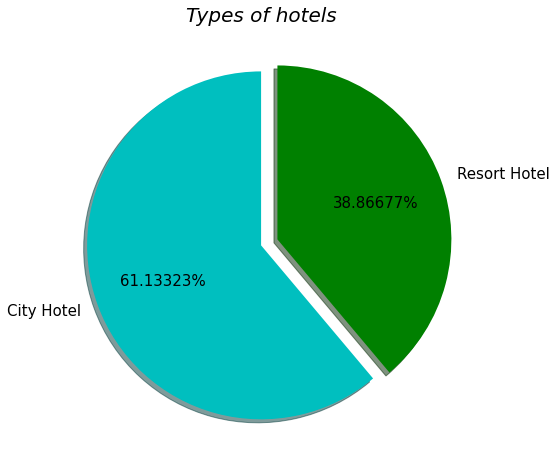

In [18]:
plt.rcParams['figure.figsize'] = (15, 8)

explode = (0, 0.1)
plt.pie(type_of_hotels, explode, autopct='%1.5f%%', colors = ['c','g'], 
        shadow=True, startangle=90, labels = type_of_hotels.index, textprops={'fontsize': 15} )
plt.title('Types of hotels', fontsize = 20, fontstyle = 'italic')




#### There are 61.1% of City Hotels and 38.8% of Resort Hotels were booked. Therefore City Hotels are more preferred by guests compared to Resort hotels.



###2. Booking cancellation info :

In [ ]:
cancellation_details = new_hotel_df.groupby('hotel')['is_canceled'].value_counts()
cancellation_details

hotel         is_canceled
City Hotel    0              37379
              1              16049
Resort Hotel  0              25992
              1               7976
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Percentage of bookings that are canceled at diffrent type of hotels')

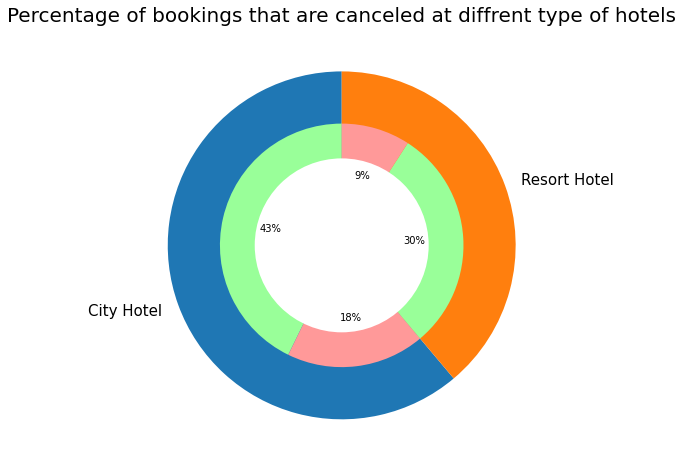

In [ ]:
plt.pie(type_of_hotels, startangle=90,frame=True, labels = type_of_hotels.index, textprops={'fontsize': 15})
plt.pie(cancellation_details,radius=0.70,autopct='%1.0f%%',startangle=90, colors = ['#99ff99', '#ff9999'])

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
plt.gcf().gca().add_artist(centre_circle)

plt.title('Percentage of bookings that are canceled at diffrent type of hotels', fontsize=20)

####we can observe from the above pie visualization that the max bookings and cancelations are happening in city hotel.
total bookings that are cancelled = (18%+9%) = 27%

total bookings that are not cancelled = (43%+30%) = 73%
1.   green = bookings not cancelled
2.   pink = bookings cancelled


###3. Hotel Bookings based on meals: 



- RO: Room only

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- AI: All Inclusive (all services of full board plus any others specified in each case)

In [ ]:
bookings_based_on_meals = new_hotel_df['meal'].value_counts()
bookings_based_on_meals

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0.5, 1.0, 'Hotel Bookings Based On Meals')

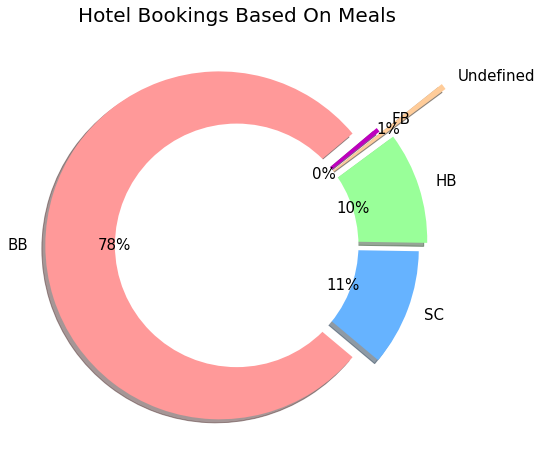

In [ ]:
# visualization of Hotel Bookings Based on Meals:
centre_circle = plt.Circle((0,0),0.70,fc='white')

plt.pie(bookings_based_on_meals, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'm'], explode = (0.1,0.05,0.1,0.5,0.05), labels=bookings_based_on_meals.index, 
        textprops={'fontsize': 15}, autopct='%1.0f%%', startangle=40, shadow=True)

plt.gcf().gca().add_artist(centre_circle)
plt.title('Hotel Bookings Based On Meals', fontsize=20)

#### From the above pie visualization we can conclude that 78% of Hotel Bookings are happening on 'BB' meal type     i.e, 'BB: Bed & Breakfast'

###4. Month wise booking:

In [ ]:
new_hotel_df['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Month wise Hotel Booking')

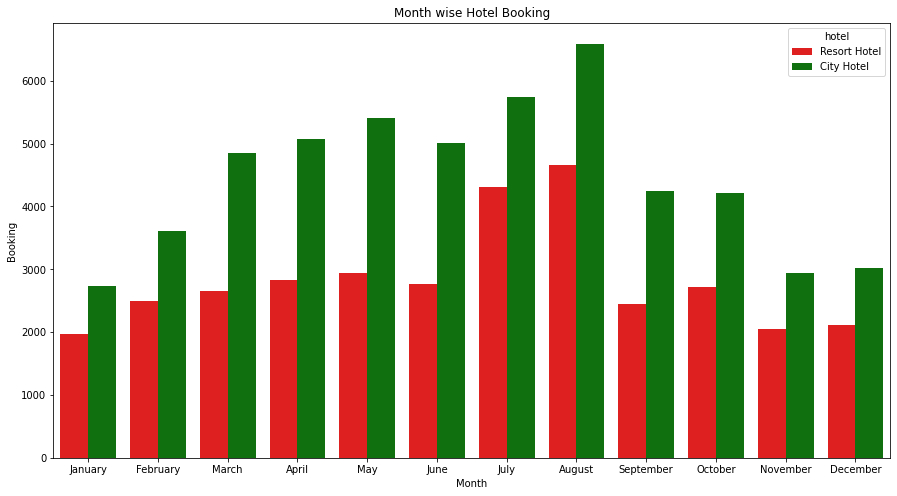

In [ ]:
sns.countplot(x=new_hotel_df['arrival_date_month'],order=['January','February','March','April','May','June','July','August','September','October','November',
                                                          'December'], hue=new_hotel_df["hotel"], palette=['red','green'])
plt.xlabel('Month')
plt.ylabel('Booking')
plt.title("Month wise Hotel Booking")

####Most of the city and resort bookings are happening in the month of **August**

###5. Top countries from most visited people :

In [ ]:
No_Null_country_df['country'].value_counts().head(10)
# we are working on contry column which has null values so we will use non_null_country_df to remove the null values

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

Making data frame of top 10 countries only 

In [ ]:
top10 = No_Null_country_df[No_Null_country_df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD"])]

Plotting the bar plot of top 10 countries


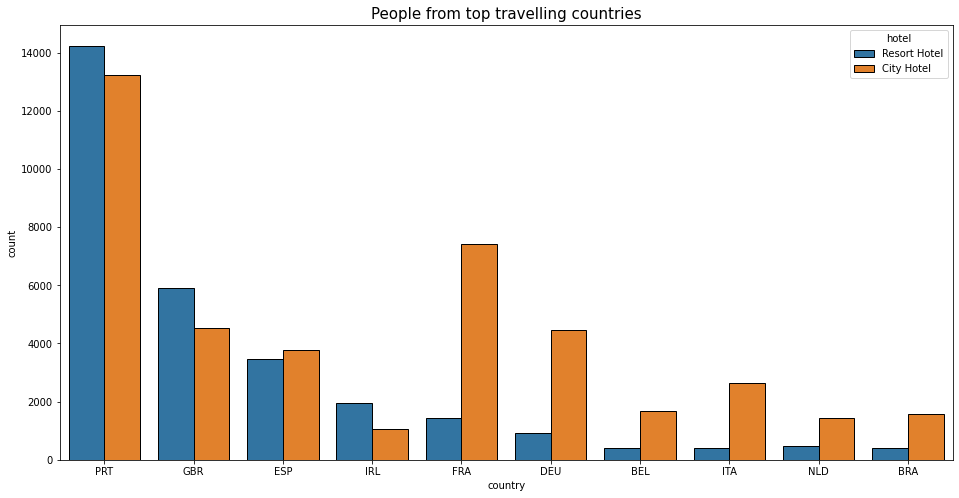

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='country', hue='hotel', data=top10, edgecolor='black')
plt.title('People from top travelling countries', fontsize= 15)
plt.show()

####From the above bar chart visualization we can notice that most of the hotel bookings are happening in **"PTR(Portugal)"** country. we can also abserve that the maximum people are preferring city hotels compared to Resort Hotels.

###6. The room type bookings :

In [ ]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [ ]:
colms = ['arrival_date_year', 'arrival_date_week_number']
new_hotel_df['arrival_week_year'] = new_hotel_df[colms].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [ ]:
new_hotel_df.iloc[:]['arrival_week_year']

0         2015-27
1         2015-27
2         2015-27
3         2015-27
4         2015-27
           ...   
119385    2017-35
119386    2017-35
119387    2017-35
119388    2017-35
119389    2017-35
Name: arrival_week_year, Length: 87396, dtype: object

In [ ]:
reserved_room_type_df = new_hotel_df.groupby(['arrival_week_year'])['reserved_room_type'].value_counts().unstack().fillna(0)
reserved_room_type_df

reserved_room_type,A,B,C,D,E,F,G,H,L,P
arrival_week_year,,,,,,,,,,
2015-27,128.0,0.0,6.0,37.0,26.0,7.0,9.0,5.0,0.0,0.0
2015-28,211.0,2.0,11.0,53.0,41.0,8.0,16.0,5.0,1.0,0.0
2015-29,238.0,0.0,7.0,62.0,33.0,9.0,12.0,7.0,3.0,0.0
2015-30,257.0,4.0,12.0,67.0,43.0,7.0,19.0,4.0,0.0,0.0
2015-31,249.0,6.0,12.0,67.0,39.0,13.0,19.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2017-5,516.0,2.0,7.0,67.0,39.0,13.0,11.0,3.0,0.0,0.0
2017-6,518.0,6.0,4.0,93.0,54.0,16.0,9.0,6.0,0.0,0.0
2017-7,597.0,1.0,8.0,165.0,57.0,37.0,30.0,6.0,0.0,0.0


Text(0.5, 0, 'year-week')

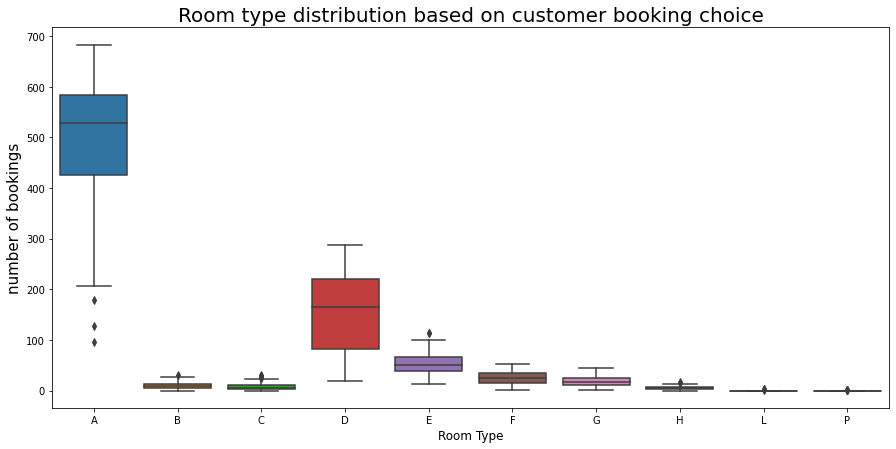

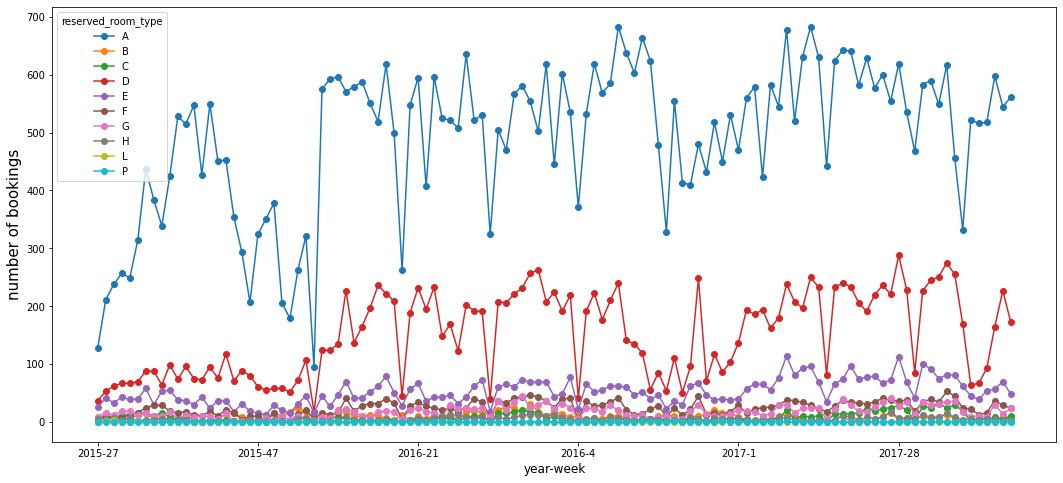

In [ ]:
# reserved room type distribution box plot
plt.figure(figsize=(15,7))
sns.boxplot(data = reserved_room_type_df)

plt.title('Room type distribution based on customer booking choice', fontsize = 20)
plt.ylabel('number of bookings', fontsize = 15)
plt.xlabel('Room Type', fontsize = 12)

''' Multiline plot is used to show the reserved room type choices over previous years-week '''
reserved_room_type_df.plot(figsize = (18,8), marker ='o')

plt.ylabel('number of bookings', fontsize = 15)
plt.xlabel('year-week', fontsize = 12)

Box plot - Whiskers are set at 1.5 * IQR ( Q3 - Q1)

#### Most demanded room type are A next comes D and least bookings are happend for room type P and L. Maximum bookings are happened in 9th and 12th week of every year.

###7. The possibility of getting the reserved room type:

In [ ]:
# This dataframe shows information of assigned rooms over reserved rooms using type of rooms data from previous records

possibility_of_getting_room_df = new_hotel_df.groupby(['reserved_room_type'])['assigned_room_type'].value_counts().unstack().fillna(0)
possibility_of_getting_room_df

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,45879.0,894.0,1256.0,6410.0,1035.0,390.0,178.0,94.0,209.0,207.0,0.0,0.0
B,106.0,874.0,0.0,5.0,2.0,2.0,8.0,0.0,0.0,2.0,0.0,0.0
C,5.0,2.0,867.0,6.0,4.0,2.0,10.0,9.0,10.0,0.0,0.0,0.0
D,296.0,27.0,33.0,15984.0,657.0,199.0,82.0,9.0,67.0,44.0,0.0,0.0
E,15.0,3.0,6.0,22.0,5462.0,383.0,98.0,4.0,40.0,16.0,0.0,0.0
F,6.0,17.0,0.0,4.0,31.0,2636.0,113.0,3.0,10.0,3.0,0.0,0.0
G,5.0,2.0,2.0,0.0,4.0,14.0,1999.0,7.0,15.0,4.0,0.0,0.0
H,0.0,0.0,0.0,1.0,0.0,0.0,10.0,579.0,6.0,0.0,0.0,0.0
L,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# correlation matrix of probability of getting room types

corr_df = possibility_of_getting_room_df.corr()
corr_df

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
assigned_room_type,,,,,,,,,,,,
A,1.000000,0.677066,0.802559,0.285687,0.064929,0.011067,-0.041772,0.044322,0.945082,0.978341,-0.112254,-0.112278
B,0.677066,1.000000,0.482827,0.119602,-0.061238,-0.095209,-0.136130,-0.073218,0.576892,0.641596,-0.171827,-0.172777
C,0.802559,0.482827,1.000000,0.174079,-0.028634,-0.085411,-0.119177,-0.035989,0.743329,0.764225,-0.166487,-0.167259
D,0.285687,0.119602,0.174079,1.000000,0.013908,-0.063534,-0.108307,-0.098240,0.530160,0.464751,-0.150679,-0.150679
E,0.064929,-0.061238,-0.028634,0.013908,1.000000,0.007880,-0.106826,-0.137905,0.224545,0.133432,-0.148281,-0.148281
F,0.011067,-0.095209,-0.085411,-0.063534,0.007880,1.000000,-0.100902,-0.156899,0.015364,0.007352,-0.156021,-0.156452
G,-0.041772,-0.136130,-0.119177,-0.108307,-0.106826,-0.100902,1.000000,-0.137535,-0.031465,-0.051793,-0.142112,-0.142112
H,0.044322,-0.073218,-0.035989,-0.098240,-0.137905,-0.156899,-0.137535,1.000000,-0.010434,0.004470,-0.135197,-0.137140
I,0.945082,0.576892,0.743329,0.530160,0.224545,0.015364,-0.031465,-0.010434,1.000000,0.989820,-0.194362,-0.194362


The below correlation matrix indicates probability of getting type of rooms over customer choice of reserved type of rooms. 

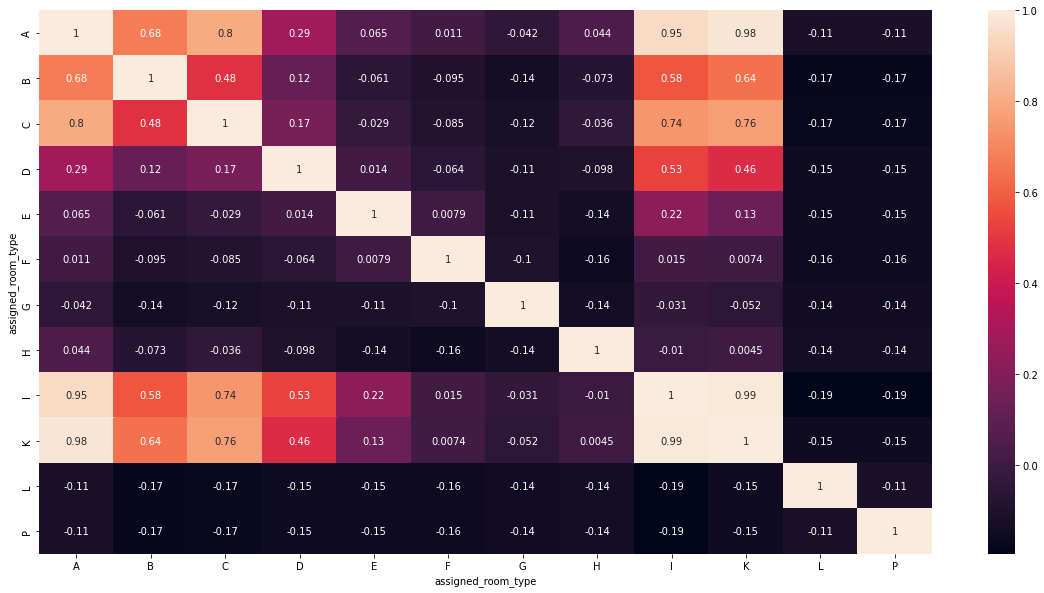

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot=True)
#cmap = "RdBu"


#### The lighter color indicates the more probability of getting the reserved type of room and the darker color indicates the less/no probability of getting the room of customer choice.

###8. Analysing Lead Time Of Bookings:

Booking or Reservation **Lead Time** is the period of time (most typically measured in calendar days) between when a guest makes the reservation and the actual check-in/arrival date

#### calculating lead time with respect to arrival date

In [ ]:
# gathering the arrival date info
colms_1 = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
new_hotel_df['arrival_date'] = new_hotel_df[colms_1].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
colms_2 = ['arrival_date_month', 'arrival_date_day_of_month']
new_hotel_df['arrival_month_date'] = new_hotel_df[colms_2].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
new_hotel_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_week_year,arrival_date,arrival_month_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-27,2015-July-1,July-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-27,2015-July-1,July-1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-27,2015-July-1,July-1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-27,2015-July-1,July-1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-27,2015-July-1,July-1


In [ ]:
# Analysing the lead time and date in year, weeks, months and days: 
date = new_hotel_df.iloc[:]['arrival_date']
time = new_hotel_df.iloc[:]['lead_time']
year_date = new_hotel_df.iloc[:]['arrival_date_year']
week_date = new_hotel_df.iloc[:]['arrival_date_week_number']

Lead time taken for all the previous years bookings

In [ ]:
lead_time_df = pd.DataFrame({"arrival_date_1" : week_date, "lead_time_1" : time})
lead_time_df

,arrival_date_1,lead_time_1
0,27,342
1,27,737
2,27,7
3,27,13
4,27,14
...,...,...
119385,35,23
119386,35,102
119387,35,34
119388,35,109


Text(27.125, 0.5, 'lead_time')

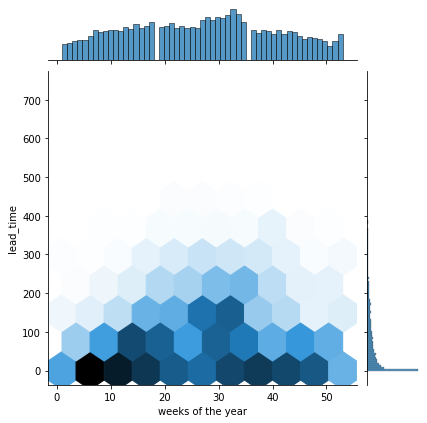

In [ ]:
# lead time analysis by months of the year 2015

sns.jointplot(kind = 'hex', x='arrival_date_1', y='lead_time_1', data =lead_time_df, gridsize=10)

#setting labels for x, y and set title for lineplot
plt.xlabel('weeks of the year')
plt.ylabel('lead_time')



####The bar plots represents max bookings happend in the weeks in X-axis i.e, (max bookings happend b/w week 30 to 35) and max lead_time taken for booking in Y-axis i.e, (max lead time taken is 0-immediate booking)

####hexplot represents max leadtime taken in the b/w 11th - 18th weeks of the year. 

###9. Analysis of lead time year by year:



---





In [ ]:
lead_time_year_df = pd.DataFrame({"arrival_year" : year_date, "lead_time_2" : time})

###`Lead time in the year 2015:`








In [ ]:
# lead time for the hotel booking in the year- 2015
lead_time_list_1 =[]
year_list =[]
week_list_1 =[]
month_list =[]
month_date_list =[]
hotel_list_1 =[]
for index, row in lead_time_year_df.iterrows():
    if (lead_time_year_df.loc[index,'arrival_year'] == 2015):
      lead_time_list_1.append(new_hotel_df.loc[index, 'lead_time'])
      year_list.append(new_hotel_df.loc[index,'arrival_date'])
      week_list_1.append(new_hotel_df.loc[index,'arrival_date_week_number'])
      month_list.append(new_hotel_df.loc[index,'arrival_date_month'])
      month_date_list.append(new_hotel_df.loc[index,'arrival_month_date'])
      hotel_list_1.append(new_hotel_df.loc[index,'hotel'])
  

### `Lead time in the year 2016:`

In [ ]:
# lead time for the hotel booking in the year- 2016
lead_time_list_2 =[]
hotel_list_2 =[]
week_list_2 =[]
for index, row in lead_time_year_df.iterrows():
    if (lead_time_year_df.loc[index,'arrival_year'] == 2016):
      lead_time_list_2.append(new_hotel_df.loc[index, 'lead_time'])
      hotel_list_2.append(new_hotel_df.loc[index,'hotel'])
      week_list_2.append(new_hotel_df.loc[index,'arrival_date_week_number'])

###` Lead time in the year 2017:`

In [ ]:
# lead time for the hotel booking in the year- 2017
lead_time_list_3 =[]
hotel_list_3=[]
week_list_3 =[]
for index, row in lead_time_year_df.iterrows():
    if (lead_time_year_df.loc[index,'arrival_year'] == 2017):
      lead_time_list_3.append(new_hotel_df.loc[index, 'lead_time'])
      hotel_list_3.append(new_hotel_df.loc[index,'hotel'])
      week_list_3.append(new_hotel_df.loc[index,'arrival_date_week_number'])

In [ ]:
# DataFrames of lead_time v/s week_date of previous years data:
a_list_1 = pd.DataFrame({'lead_time_15' : lead_time_list_1, 'week_15': week_list_1})
a_list_2 = pd.DataFrame({'lead_time_16' : lead_time_list_2, 'week_16': week_list_2})
a_list_3 = pd.DataFrame({'lead_time_17' : lead_time_list_3, 'week_17': week_list_3})

In [ ]:
a_list_1

,lead_time_15,week_15
0,342,27
1,737,27
2,7,27
3,13,27
4,14,27
...,...,...
13308,77,53
13309,0,42
13310,1,50
13311,0,51


In [ ]:
a_list_1['lead_time_15'].max()

737

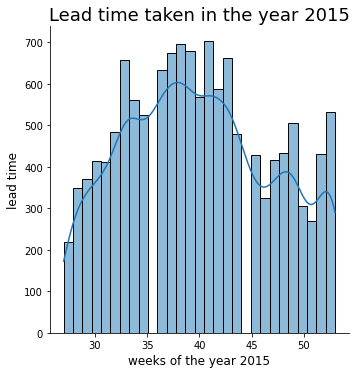

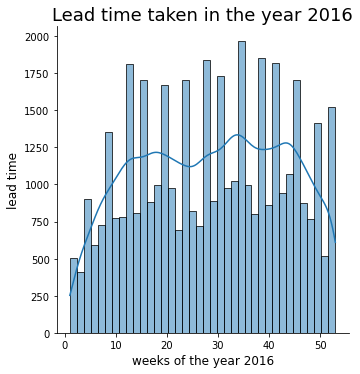

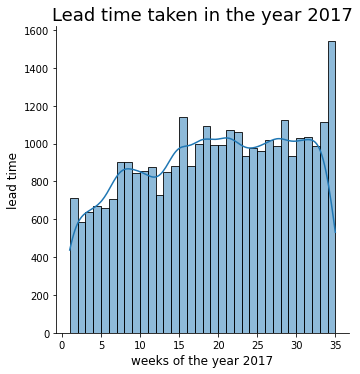

In [ ]:
# lead time analysis by weeks of the year 2015

sns.displot(data=a_list_1, x="week_15", kde=True)

plt.xlabel('weeks of the year 2015', fontsize = 12)
plt.ylabel('lead time', fontsize = 12)
plt.title("Lead time taken in the year 2015", fontsize = 18)
plt.show()


# lead time analysis by weeks of the year 2016

sns.displot(data=a_list_2, x="week_16", kde=True)

plt.xlabel('weeks of the year 2016', fontsize = 12)
plt.ylabel('lead time', fontsize = 12)
plt.title("Lead time taken in the year 2016", fontsize = 18)
plt.show()


# lead time analysis by weeks of the year 2017

sns.displot(data=a_list_3, x="week_17", kde=True)

plt.xlabel('weeks of the year 2017', fontsize = 12)
plt.ylabel('lead time', fontsize = 12)
plt.title("Lead time taken in the year 2017", fontsize = 18)
plt.show()

####From the above displot analysis we can conclude that maximum lead time taken in bookings are in the year 2016. 

###10. Number of days people stay in the hotel :   


total stay is the number of stay in the hotel, count is the number of bookings

####*Number of weekend/weekday nights booked*

In [ ]:
new_hotel_df['total_stay'] = new_hotel_df['stays_in_weekend_nights']+new_hotel_df['stays_in_week_nights']

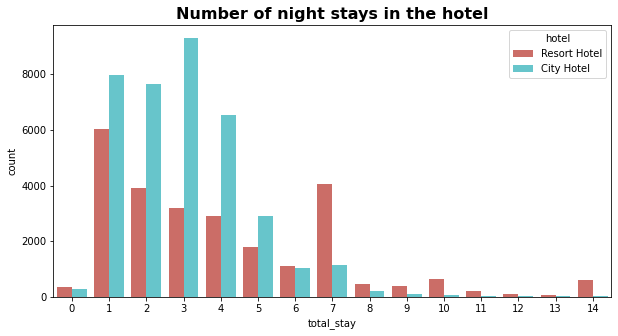

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

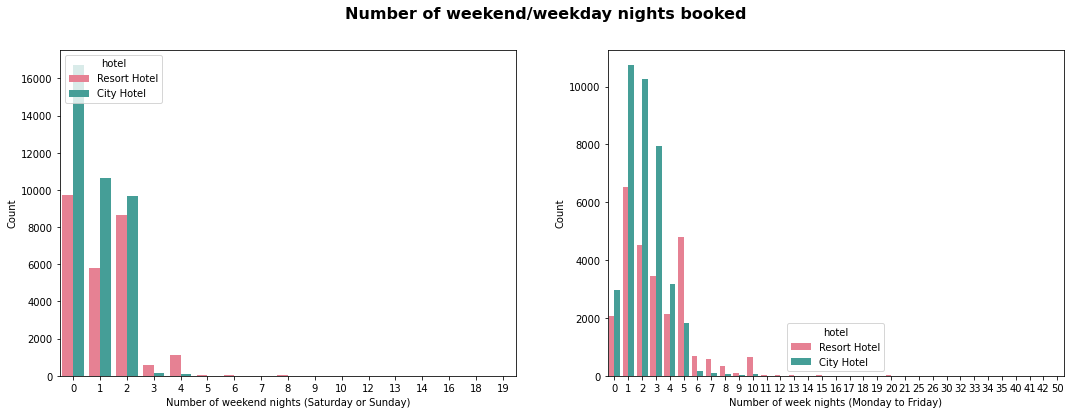

In [ ]:
# plot to show the total night stay bookings

not_canceled = new_hotel_df[new_hotel_df['is_canceled'] == 0]

s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'], palette='hls')
plt.title('Number of night stays in the hotel', fontweight='bold', fontsize=16)
plt.show()

# plot to show the weekend/weekday nights bookings

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Number of weekend/weekday nights booked", fontweight="bold", fontsize=16)
sns.countplot("stays_in_weekend_nights",hue="hotel", data = not_canceled, palette="husl", ax=ax1, )
sns.countplot("stays_in_week_nights",hue="hotel", data = not_canceled, palette="husl", ax=ax2)
ax1.set_xlabel("Number of weekend nights (Saturday or Sunday)")
ax1.set_ylabel("Count")
ax2.set_xlabel("Number of week nights (Monday to Friday)")
ax2.set_ylabel("Count")

####We can see that majority of people stay or do a booking of 5 or less than 5 days. Now, we can say the optimal length of stay to get best daily rate is '5' for week nights and '2' for weekend nights.

####max night bookings are happening in the city hotels in weekdays and the max length of stay is 1 to 2 days.

###11. Special request made by the adults.

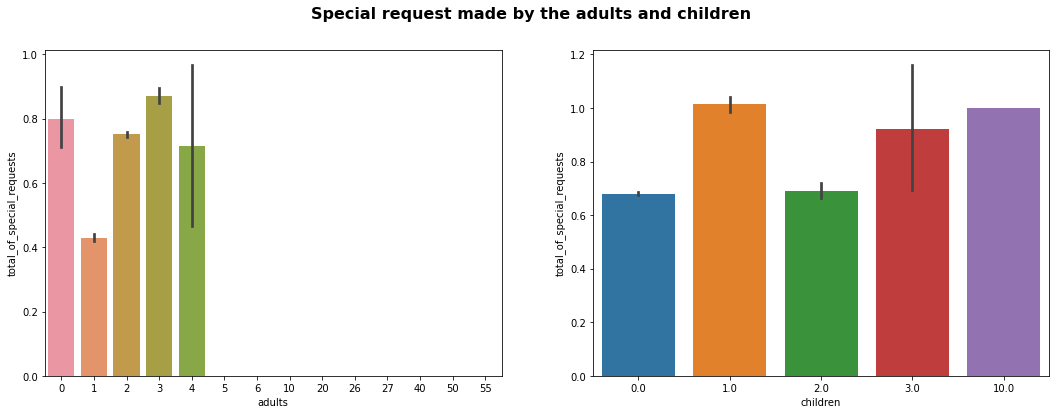

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Special request made by the adults and children", fontweight="bold", fontsize=16)
sns.barplot(x="adults", y="total_of_special_requests", data= new_hotel_df, ax=ax1)
sns.barplot(x="children", y="total_of_special_requests", data= No_Null_children_df, ax=ax2)
fig = plt.gcf()

####We can see that if the adults are more than 2, there are more chances that the hotel receives more special requests and the no. of special requests for children has no much variation.

#Analyzing on the basis of distribution channel.

###12. Distribution channel vs median lead time.
Distribution channel is the costumer accessed by corporate booking/Direct/Travel agent(TA).Travel operator(TO)
and Median lead time is the median of number of days that elapsed between the entering date of the booking into the PMS and arriving date.


In [ ]:
distribution_channel_booking = new_hotel_df.groupby('distribution_channel')
nhd1 = pd.DataFrame(round(distribution_channel_booking['lead_time'].median(),3)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
print(nhd1)

  distribution_channel  median_lead_time
0            Corporate               6.0
1               Direct              15.0
2                  GDS              10.0
3                TA/TO              62.0
4            Undefined               2.0


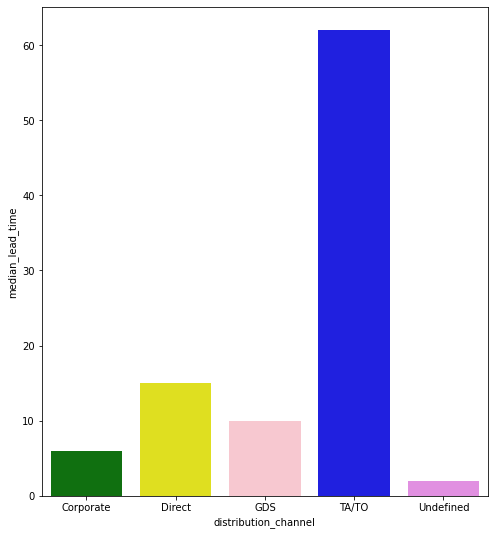

In [ ]:
plt.figure(figsize = (8,9))
sns.barplot(x = nhd1['distribution_channel'], y = nhd1['median_lead_time'],palette=['green','yellow','pink','blue','violet'])
plt.show()

#### Through TA/TO distribution channels, bookings happend with high lead time i.e, they are booking early compare to other distribution channels.

###ADR(Average daily rate) generated through various distribution channels.

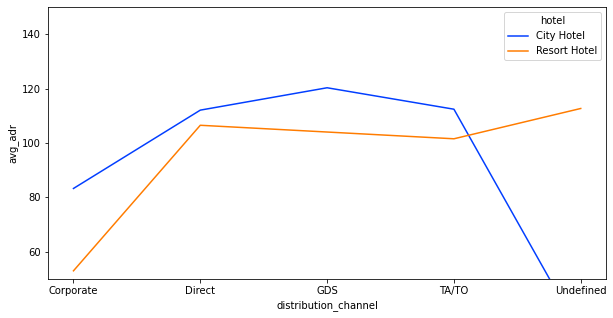

In [ ]:
distribution_channel = new_hotel_df.groupby(['distribution_channel', 'hotel'])
dc1 = pd.DataFrame(round((distribution_channel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (10,5))
sns.lineplot(x='distribution_channel', y='avg_adr', hue='hotel', data= dc1, palette='bright')
plt.ylim(50,150)
plt.show()

**Average daily rate (ADR)**, one of the three key hotel performance indicators (along with occupancy and Revenue per available room(RevPAR)), is the measure of the average paid for rooms sold in a given time period. The metric covers only revenue-generating guestrooms.


*How to calculate ADR:*

---


ADR is calculated by dividing room revenue by rooms sold. The metric is of course applicable for any currency.

ADR = Room Revenue/Rooms Sold


####As ADR is the revenue determining factor 'GDS distribution channel' of city hotel bookings are achiving high adr(revenue).

###*13*. Average Revenue of the Hotel:

> ADR = Room Revenue/Rooms Sold


> Room Revenue = ADR * Rooms Sold


> Total Revenue = Total ADR * Total Rooms Sold


> Avg Room Revenue = mean ADR * mean Rooms Sold

Now, Rooms sold are calculated based on no. of booking ie., no. of adult bookings+ no. of children bookings













In [ ]:
No_Null_children_df['revenue'] = No_Null_children_df['adr'] * (No_Null_children_df['adults']+No_Null_children_df['children'])

# Resort hotels revenue
resort_revenue = No_Null_children_df.loc[(No_Null_children_df.is_canceled == 0)&(No_Null_children_df.hotel == 'Resort Hotel'),'revenue']
avg_room_revenue_1 = resort_revenue.mean()
print(f"The avg revenue for the Resort Hotels is - {avg_room_revenue_1} currency per hotel")


# city hotels revenue
city_revenue = No_Null_children_df.loc[(No_Null_children_df.is_canceled == 0)&(No_Null_children_df.hotel == 'City Hotel'), 'revenue']
avg_room_revenue_2 = city_revenue.mean()
print(f"The avg revenue for the City Hotels is - {avg_room_revenue_2} currency per hotel")


The avg revenue for the Resort Hotels is - 200.76069059710682 currency per hotel
The avg revenue for the City Hotels is - 227.31835469113676 currency per hotel


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


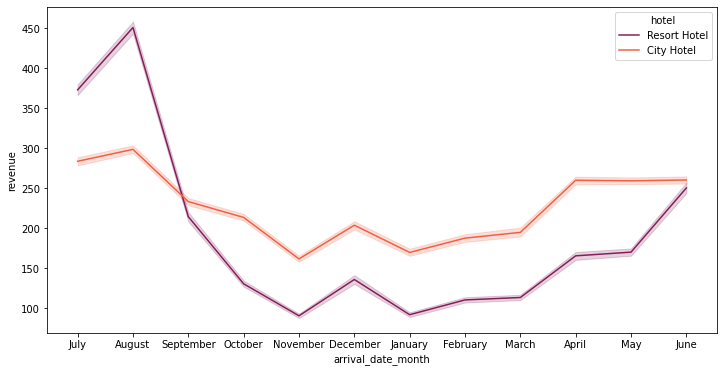

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x='arrival_date_month', y='revenue', hue='hotel', data= No_Null_children_df, palette='rocket')


####From the above analysis we can notice that the Resort hotels are getting highest revenue in the month of 'august', 'july' and then decreases drastically. City hotel's revenue is almost constant all over year.

###14.Chances of customer will return :


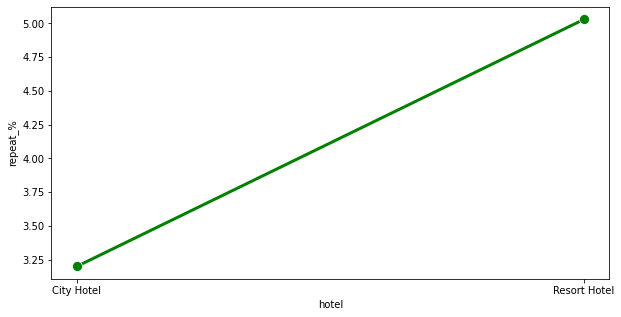

In [ ]:
grouped_by_hotel = new_hotel_df.groupby('hotel')

# Selecting th repeated customers booking and counting them
repeated_data =new_hotel_df[new_hotel_df['is_repeated_guest']==1]
repeated_group =repeated_data.groupby('hotel')
D01=pd.DataFrame(repeated_group.size()).rename(columns ={0: 'total_repeated_guests'})

#Total booking
total_booking = grouped_by_hotel.size() 
D02= pd.DataFrame(total_booking).rename(columns={0:"total_booking"})
D03=pd.concat([D01,D02],axis =1)

# Calculating repear %
D03['repeat_%']=round((D03["total_repeated_guests"]/D03["total_booking"])*100,2)

plt.figure(figsize = (10,5))
sns.lineplot(x = D03.index , y=D03["repeat_%"], linewidth=3, color ='g', markersize=10, marker='o')
plt.show()

####There is a very less probability that the customer will repeat. But the return percentage of resort is slightly greater than that of city hotel.

### 15. Analysing the variactions of all numerical data of data set:

In [19]:
total_data = new_hotel_df.drop(['days_in_waiting_list','previous_bookings_not_canceled','previous_cancellations','reservation_status_date', 'reservation_status', 'customer_type', 'deposit_type', 'distribution_channel', 'market_segment','country','meal','arrival_date_month','arrival_date_week_number','arrival_date_week_number','arrival_date_year','hotel'], axis = 1)

In [20]:
total_corr_data = total_data.corr()

Text(0.5, 1.0, 'Total analysis')

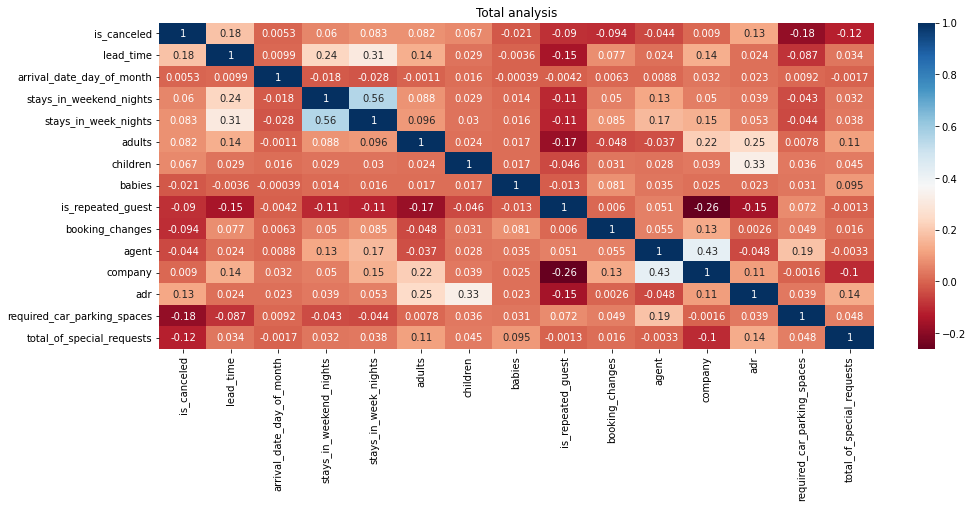

In [24]:
plt.figure(figsize=(16,6))
sns.heatmap(total_corr_data, annot=True, cmap = "RdBu")
plt.title('Total analysis')


#### The blue colour shows that highest probability of column features influesnce wit respect to that of the row feature in correlation matrix.
eg.: cancellation of bookings mainly influenced by 'Lea time' and 'Adr'(Average daily rate)

###Conclusion :

*   Around 61% bookings are of City hotel and 39% bookings areof Resort hotel, therefore City hotels are busier than the Resort Hotels.
*   Around 27% of total bookings are cancelled, in that 66.6% cancellations are happening in City hotels.
*   In both resort and city hotels most of the bookings are happening in "PTR(Portugal)" country. we can also observe that the maximum people are preferring city hotels compared to Resort Hotels.
*   Most of the city and resort bookings are happening in the month of August. Followed by July. Least bookings are happening in the month of January, November and December.
*   The Resort hotels are getting highest revenue in the month of 'august', 'july' and then decreasing drastically. City hotel's revenue is almost constant all over year.
*   Maximum bookings are happening in 9th and 12th week of every year.
*   78% of Hotel Bookings are happening on 'BB' meal type i.e, 'BB: Bed & Breakfast'.
*   Most demanded room types are A next comes D and least demanded are of room type P and L.
*   Probability of room allocation for the customer choice reserved type A is in the order - A, K, I, C, B.
*  High probability of lead time taken is '0' i.e, immediate booking are happening but high leadtime taken is in the b/w 11th - 18th weeks of the year. Hence, this time is the busiest time of the year.
*  The maximum lead time taken in bookings is in the year 2016.
*   Majority of people stay or do a booking of 5 or less than 5 days. Now, we can say the optimal length of stay to get best daily rate is '5' for week nights and '2' for weekend nights.
*   Max night bookings are happening in the city hotels in weekdays and the max length of stay is 1 to 2 days.
*  Through TA/TO distribution channels, bookings happened with high lead time i.e, they are booking early compare to other distribution channels.
*   As (Average daily rate) ADR is the revenue determining factor 'GDS distribution channel' of city hotel bookings are achieving high adr(revenue).